# Using Sci-Kit Learn
## Welcome to Machine Learning

In this session we consider a simple linear regression. The simplest tool in the 'machine learning' tool kit.

While this is simple it can give us insight into many statistical relationships and is the basis for more complex and robust analysis.

While the statistics are simple we will take the chance to introduce some terminology and get familiar with the basic tools.

Let's start as always by importing our favourite Python packages.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Let's also import our machine learning package. Many may prefer Google's tensorflow but we will initially consider Sci-Kit Learn a similar opensource package that does the same things in a similar way but is easier to integrate into an intro to data science tutorial series (tensorflow has its own vanacular and syntax which adds to the initial learning but we'll get to tensorflow before too long).

In [2]:
import sklearn

We'll also turn down the warnings in order to keep our notebook clean (as we use some older features to keep things simple for now)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Simple Linear Regression
#### Ordinary Least Squares

In linear regression we assume that our dependent variable (that which we aim to predict/understand) is dependent on some set or variables (the regressors). That is we have a model as follows:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon = \bf{\beta^Tx} + \epsilon$$ 

In the above $y$ is our dependent vairable with the $x$ variables being the regressors. The $\epsilon$ term is an 'error' term that we aim to minimise. The vector of paramters $\bf{\beta}$ is what we aim to estimate. These parameters are used to minimise the difference between what our model predicts and what has been observed in the data.

The 'distance' between the predicted and observed points is measured using the sum of sqaured residuals. That is:

$$\sum_i(\hat{y_i}-y_i)^2$$

Where $\hat{y}$ denotes modelled values and $y$ denotes observations. This means that larger deviations are more heavily weighted in our measure of fit and positive and negative errores are treated equally.

To highlight that data may often be meaningless, let's make our own data set to analyse. Hopefully seeing this early in your data science career will serve as a reminder that complex trickery cannot compensate for nonsensical data.

Since linear regression estimates a linear relationship let's make our data set from a linear relationship with some random noise. This ensures that the linear approach is appropriate (rather than searching for relationships in white noise).

Let's create 500 data points using NumPy's (pseudo)random number generator utility.

In [4]:
x1 = np.random.uniform(0,10,500)
x2 = np.random.uniform(0,5,500)
y = 3.4 + 2 * x1 + 7 * x2
y_noisy = y + np.random.normal(0,5,500)

Let's now plot our data to visualise the relationship before we formalise it in statistics.

Since we have three variables let's use a 3D plot.

<IPython.core.display.Javascript object>


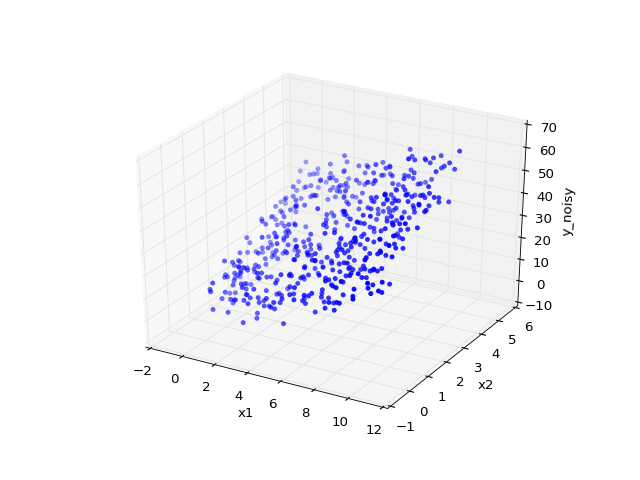

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y_noisy, edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_noisy')

### The Model
Now let's put our data into a pandas dataframe so that we can play with it. 

In [6]:
data = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y_noisy})
data.head()

,x1,x2,y
0,9.689571,4.661755,54.370890
1,8.381526,1.189890,24.405925
2,3.311652,1.055348,9.357105
3,6.095877,0.545323,8.988553
4,2.916673,3.939839,34.371673


The first steps in modelling are as follows:

1. Instantiate the model
2. Fit the model using the data to estimate the paramters
3. Evaluate the model by using it on new data

Let's begin by initialising our model from Sci-Kit Learn.

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

Let's now split our dataset into regressors and output so that things don't get consfused.

We don't want to use the output to model the output because clearly this is trivial and gives us no information.

In [8]:
output = data['y']
regressors = data.drop('y', axis = 1)

Now the data is ready for modelling so let's run our model.

In [9]:
linear_regression_model.fit(regressors, output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

So we've done our first bit of machine learning!

But what has this told us?

In [10]:
beta0 = linear_regression_model.intercept_
beta1 = linear_regression_model.coef_[0]
beta2 = linear_regression_model.coef_[1]
print('Our preictive model is y = %f + %f x1 + %f x2' % (beta0, beta1, beta2))

Our preictive model is y = 2.867998 + 2.089741 x1 + 7.115621 x2


Now we have constructed a model let's see how well it works.

First let's plot the data points and the predicted plane using a 3D plot.

<IPython.core.display.Javascript object>


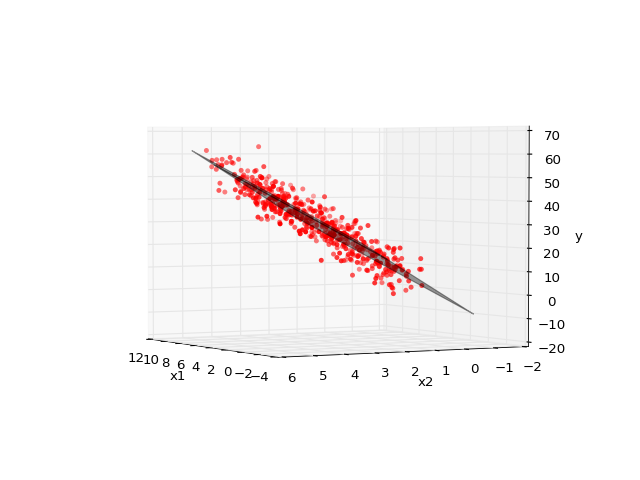

In [18]:
x1_points, x2_points = np.meshgrid(range(14), range(7))
x1_points -= 2
x2_points -= 1
y = beta0 + beta1 * x1_points + beta2 * x2_points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_points, x2_points, y, alpha=0.4, color='black')
ax.scatter(x1, x2, y_noisy, edgecolor='none', c='r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Clearly this plot is hard to interpret and really take much meaning out of so let's use a staistical measure of goodness of fit. The $R^2$ statistic.

This is a measure of how much of the variation in our data is explained by our model. It is defined as follows:

$$R^2 = 1 - \frac{SSR}{SST}$$

Where SSR is the sum of the squared residuals (the prediction errors) and SST is the total sum of squares that is the sum of the squared deviations from the mean across all or our modeled variable (y). This measure is also known as the coeffiecient of detemination.

To work this out first we have to work out what the model predicts for our input data and then calculate the residuals to get the R-squared value. Thankfully Sci-Kit Learn does this for us all in one line.

In [12]:
linear_regression_model.score(regressors, y_noisy)

0.86035363900787909

Our model explains approximately 85% of the variation in our data, not a bad model.

This value will vary each time this noteboos is run since the dataset is constructed from a random distribution each time and therefore will change each time. However this measure is roughly determined by the variance of the normal distribution from which we draw the 'noise' added to our y values to avoid having a perfect fit. 

### Training Data Vs. Testing Data
The true test of a model is how well it works for data beyond those used in its construction and calibration. This is where models become useful, otherwise they only describe what we already know which may be insightful but only becomes applicable looking to the future.

In light of this let us use a different set of data (the testing set) to test our model. Often in machine leaning the initial dataset is split into training and testing data so that the model can be evaluated before being released into the wild.

However, even this approach has limitations. For example, quantitative trading strategies tend to be backtested against market data for many decades. This only really tells us how they would have performed in the past but what we want is future performance. Clearly we cant get data from the future so this is as good as it gets in investing but the same principles apply across data science. Be careful not to assume that any dataset you have represents the entire universe of interest.

Let's redo our modelling by first splitting our dataset in two (training and testing data) and then using the training data to get a model and test how good a model it is using the testing data.

When splitting the data one needs to be careful since it is important to have the two sides both being representative of the population with variation across the dependent values else the model and the test become invalid.

Sci-Kit Learn has a tool that helps us to do this. First we import it then use it to take one fifth of our data out for testing purposes leaving 80% for training.

In [13]:
from sklearn.cross_validation import train_test_split
training_data, testing_data = train_test_split(data, test_size = 0.2)

Now we can rebuild our model and test how well it works with the test data.

In [14]:
new_linear_model = LinearRegression()
new_linear_model.fit(pd.DataFrame({'x1':training_data.x1, 'x2':training_data.x2}), training_data.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let us compare the $R^2$ for the training data and the test data.

In [15]:
training_data_r2 = new_linear_model.score(training_data.drop('y', axis = 1), training_data.y)
testing_data_r2 = new_linear_model.score(testing_data.drop('y', axis = 1), testing_data.y)

print('Coefficient of determination for the training data is %.2f' % training_data_r2)
print('Coefficient of determination for the test data is %.2f' % testing_data_r2)

Coefficient of determination for the training data is 0.86
Coefficient of determination for the test data is 0.86


As we would expect the out-of-sample fit is worse than the in sample fit. The model works less well with 'new' and unknown data than with the data used in its construction. This may not always be true since the data are (in this case explicitly) random and hence it may be that the test data set happens to be data points close to the predicted realtionship but this is highly unlikely.

The key lesson to take away is that we should always evaluate our models on unseen data so that we don't trick ourselves into thinking we have a performant model when, in reality, we have just overfit the training data.



This tutorial follows the work of Columbia Univerisity's Application Development Initative for their 2017 DevFest.
We will continue to follow this as we move forwards. The orignal tutorial can be found <a href="https://devfe.st/learn/datascience/">here</a>.

Our thanks to Lucas Schuermann, Rachel Zhang, Zach Robertson, Jillian Knoll and Ashutosh Nanda.

<h4>Questions? <a href="mailto:ian.davies@moodys.com">Contact me by email</a></h4>